In [1]:
import os

os.chdir(r'C:\MSBA\Summer 2020\2205-INSY-5378-Data Science\Assignment 2\Patents_xls')

In [2]:
import glob as glob

file_names_xlsx = glob.glob('*.xlsx')
print(file_names_xlsx, type(file_names_xlsx))

['Apple.xlsx', 'Google.xlsx', 'HTC.xlsx', 'Huawei.xlsx', 'InterDigital.xlsx', 'Kodak.xlsx', 'LG.xlsx', 'Nokia.xlsx', 'Oracle.xlsx', 'Pantech.xlsx', 'Samsung.xlsx', 'Sony Ericsson.xlsx', 'ZTE.xlsx'] <class 'list'>


In [3]:
import pandas as pd 

for name in file_names_xlsx: 
    df = pd.read_excel(name)
    df[['TI','AB']] = df[['TI','AB']].fillna('') 
    df['TI+AB'] = df['TI'] + ' ' + df['AB']
    text = ' '.join(list(df['TI+AB']))
    
    filename = name.split('.')[0] + '.txt'
    with open(filename, 'w', encoding='utf-8') as outfile:
        outfile.write(text)

In [4]:
file_names_txt = glob.glob('*.txt')
print(file_names_txt, type(file_names_txt))

firm_names = [name.split('.')[0] for name in file_names_txt]
print(firm_names, type(firm_names))

['Apple.txt', 'Google.txt', 'HTC.txt', 'Huawei.txt', 'InterDigital.txt', 'Kodak.txt', 'LG.txt', 'Nokia.txt', 'Oracle.txt', 'Pantech.txt', 'Samsung.txt', 'Sony Ericsson.txt', 'ZTE.txt'] <class 'list'>
['Apple', 'Google', 'HTC', 'Huawei', 'InterDigital', 'Kodak', 'LG', 'Nokia', 'Oracle', 'Pantech', 'Samsung', 'Sony Ericsson', 'ZTE'] <class 'list'>


In [8]:
corpus_orig = []
for file_name in file_names_txt: 
    with open(file_name, 'r', encoding='utf-8') as infile: 
        corpus_orig.append(infile.read())

In [9]:
import string

exclude_chars = string.digits + string.punctuation
table = str.maketrans(exclude_chars, len(exclude_chars) * ' ')
dig_pun_excl = [doc.lower().translate(table) for doc in corpus_orig]

In [10]:
import nltk

stop_words = nltk.corpus.stopwords.words('english')
stopwords_rem = [' '.join([word for word in doc.split() if word not in stop_words]) for doc in dig_pun_excl]

In [12]:
import spacy

nlp = spacy.load('en_core_web_lg')
nlp.max_length = 6000000
corpus = [' '.join([token.lemma_ for token in nlp(doc)]).replace('PRON','').replace('-PRON-','') for doc in stopwords_rem]

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words = 'english', min_df = 2)
dtm_tfidf = vectorizer.fit_transform(corpus)
terms_tfidf = vectorizer.get_feature_names()
df_dtm_tfidf = pd.DataFrame(dtm_tfidf.toarray(), columns = terms_tfidf, index = firm_names)
df_dtm_tfidf

,aa,aaa,aal,ab,abandon,abbreviate,abbreviated,abbreviation,aberration,ability,...,zip,zirconium,zn,zno,zone,zoom,zooming,δt,δv,μm
Apple,0.000000,0.000398,0.000000,0.000970,0.000000,0.000000,0.000000,0.000547,0.001747,0.005343,...,0.000000,0.000000,0.000000,0.000000,0.002301,0.010068,0.000000,0.00000,0.000000,0.000000
Google,0.000000,0.000000,0.000000,0.000000,0.000000,0.000386,0.000000,0.000000,0.000000,0.001913,...,0.000435,0.000000,0.000000,0.000000,0.005950,0.002060,0.000000,0.00087,0.000870,0.000000
HTC,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
Huawei,0.000000,0.006899,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005215,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
InterDigital,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.003284,0.000000,0.000000,0.00000,0.000000,0.000000
Kodak,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003296,0.000403,...,0.000000,0.000732,0.000000,0.000000,0.004341,0.017365,0.000000,0.00000,0.000000,0.000000
LG,0.000000,0.000000,0.001556,0.000000,0.000120,0.000425,0.000120,0.000598,0.000574,0.000234,...,0.000000,0.000106,0.000120,0.000838,0.004723,0.002456,0.000318,0.00012,0.000000,0.003351
Nokia,0.000762,0.000831,0.008757,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001860,...,0.000000,0.000000,0.000000,0.000000,0.001202,0.004206,0.000000,0.00000,0.000000,0.000000
Oracle,0.000000,0.000000,0.000000,0.000000,0.000336,0.000000,0.000000,0.000000,0.000000,0.005082,...,0.003355,0.000000,0.000000,0.000000,0.010591,0.000530,0.001190,0.00000,0.000000,0.000000
Pantech,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.038391,0.000000,0.00000,0.000000,0.000000


In [14]:
from sklearn.metrics.pairwise import cosine_similarity

similarity = cosine_similarity(dtm_tfidf)
cos_distance = 1 - similarity
df_cos_distance = pd.DataFrame(cos_distance, columns = firm_names, index = firm_names)
df_cos_distance

,Apple,Google,HTC,Huawei,InterDigital,Kodak,LG,Nokia,Oracle,Pantech,Samsung,Sony Ericsson,ZTE
Apple,0.000000,0.115228,0.401928,0.336183,4.041840e-01,4.041465e-01,3.485487e-01,0.181515,0.225316,0.454992,3.200916e-01,2.061705e-01,4.402342e-01
Google,0.115228,0.000000,0.429530,0.262807,3.331451e-01,4.501665e-01,3.786484e-01,0.118016,0.201229,0.374166,3.546722e-01,2.075177e-01,3.897247e-01
HTC,0.401928,0.429530,0.000000,0.574305,6.051938e-01,6.224581e-01,5.331799e-01,0.426568,0.564777,0.573862,4.951251e-01,3.350856e-01,6.619026e-01
Huawei,0.336183,0.262807,0.574305,0.000000,4.204635e-01,6.289322e-01,4.590773e-01,0.174096,0.339692,0.446065,4.694525e-01,4.259379e-01,2.661310e-01
InterDigital,0.404184,0.333145,0.605194,0.420464,-2.220446e-16,7.027782e-01,5.367966e-01,0.286736,0.473143,0.438966,5.013322e-01,4.608346e-01,4.152356e-01
Kodak,0.404147,0.450166,0.622458,0.628932,7.027782e-01,-2.220446e-16,3.881172e-01,0.523659,0.589389,0.682185,3.279506e-01,5.148568e-01,7.113293e-01
LG,0.348549,0.378648,0.533180,0.459077,5.367966e-01,3.881172e-01,-2.220446e-16,0.387142,0.482855,0.492073,9.520825e-02,4.051494e-01,5.662180e-01
Nokia,0.181515,0.118016,0.426568,0.174096,2.867362e-01,5.236587e-01,3.871416e-01,0.000000,0.285396,0.302457,3.767517e-01,1.854401e-01,2.937364e-01
Oracle,0.225316,0.201229,0.564777,0.339692,4.731435e-01,5.893889e-01,4.828545e-01,0.285396,0.000000,0.569215,4.619384e-01,4.463533e-01,5.230350e-01
Pantech,0.454992,0.374166,0.573862,0.446065,4.389661e-01,6.821853e-01,4.920727e-01,0.302457,0.569215,0.000000,5.217475e-01,2.789431e-01,4.485917e-01


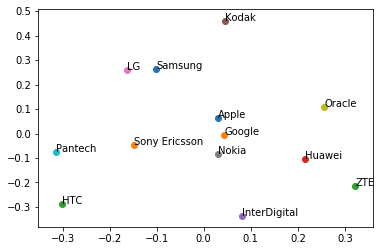

In [16]:
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

mds = MDS(n_components = 2, dissimilarity = 'precomputed', random_state = 1)
pos = mds.fit_transform(cos_distance)
xs, ys = pos[:, 0], pos[:, 1]

for x, y, name in zip (xs, ys, firm_names):
    plt.scatter(x,y)
    plt.text(x,y,name)

plt.show()

In [248]:
corpus = [open(file_name, 'r', encoding='utf-8').read() for file_name in file_names_txt]
corpus
## latin-1

['A meeting is a place, where 90 minutes are taken and 1.5 hours are wasted!! file1',
 'A meeting is a place, where 90 minutes are taken and 1.5 hours are wasted!! file2',
 'A meeting is a place, where 90 minutes are taken and 1.5 hours are wasted!! file3',
 'A meeting is a place, where 90 minutes are taken and 1.5 hours are wasted!! file4',
 'A meeting is a place, where 90 minutes are taken and 1.5 hours are wasted!! file5',
 'A meeting is a place, where 90 minutes are taken and 1.5 hours are wasted!! file6',
 'A meeting is a place, where 90 minutes are taken and 1.5 hours are wasted!! file7',
 'A meeting is a place, where 90 minutes are taken and 1.5 hours are wasted!! file8',
 'A meeting is a place, where 90 minutes are taken and 1.5 hours are wasted!! file9',
 'A meeting is a place, where 90 minutes are taken and 1.5 hours are wasted!! file10',
 'A meeting is a place, where 90 minutes are taken and 1.5 hours are wasted!! file11',
 'A meeting is a place, where 90 minutes are taken a

In [230]:
import nltk

stop_words = nltk.corpus.stopwords.words('english')
corpus_sw_rem = []

for doc in corpus_dp_excl:
    temp_list = [word for word in doc.split() if word not in stop_words]
    corpus_sw_rem.append(' '.join(temp_list))
            
print(corpus_sw_rem)

['meeting place minutes taken hours wasted file', 'meeting place minutes taken hours wasted file', 'meeting place minutes taken hours wasted file', 'meeting place minutes taken hours wasted file', 'meeting place minutes taken hours wasted file', 'meeting place minutes taken hours wasted file', 'meeting place minutes taken hours wasted file', 'meeting place minutes taken hours wasted file', 'meeting place minutes taken hours wasted file', 'meeting place minutes taken hours wasted file', 'meeting place minutes taken hours wasted file', 'meeting place minutes taken hours wasted file', 'meeting place minutes taken hours wasted file']


In [336]:
import spacy

nlp = spacy.load('en_core_web_lg')
corpus_clean = []
for doc in corpus_sw_rem:
    doc_spacy = nlp(doc)
    temp_list = [token.lemma_ for token in doc_spacy]
    text = ' '.join(temp_list).replace('PRON', '').replace('-PRON-','')
    corpus_clean.append(text)

print(corpus_clean)

['meet place minute take hour waste file', 'meet place minute take hour waste file', 'meet place minute take hour waste file', 'meet place minute take hour waste file', 'meet place minute take hour waste file', 'meet place minute take hour waste file', 'meet place minute take hour waste file', 'meet place minute take hour waste file', 'meet place minute take hour waste file', 'meet place minute take hour waste file', 'meet place minute take hour waste file', 'meet place minute take hour waste file', 'meet place minute take hour waste file']


In [227]:
import nltk

stop_words = nltk.corpus.stopwords.words('english')
corpus_sw_rem = []

for doc in corpus_dp_excl:
    temp_list = []
    for word in doc.split():
        if word not in stop_words:
            temp_list.append(word)
    corpus_sw_rem.append(' '.join(temp_list))
            
print(corpus_sw_rem)

['test string file', 'test string file', 'test string file', 'test string file', 'test string file', 'test string file', 'test string file', 'test string file', 'test string file', 'test string file', 'test string file', 'test string file', 'test string file']


In [338]:
import spacy
import nltk

nlp = spacy.load('en_core_web_lg')
stop_words = nltk.corpus.stopwords.words('english')
corpus_clean = []

for doc in corpus_dp_excl:
    temp_list = []
    doc_spacy = nlp(doc)
    for token in doc_spacy:
        print(token, token.norm_, token.lemma_)
        if token.norm_ not in stop_words:
            temp_list.append(token.lemma_)
    corpus_clean.append(' '.join(temp_list))
            
print(corpus_clean)

a a a
meeting meeting meeting
is is be
a a a
place place place
     
where where where
           
minutes minutes minute
are are be
taken taken take
and and and
              
hours hours hour
are are be
wasted wasted waste
        
file file file
a a a
meeting meeting meeting
is is be
a a a
place place place
     
where where where
           
minutes minutes minute
are are be
taken taken take
and and and
              
hours hours hour
are are be
wasted wasted waste
        
file file file
a a a
meeting meeting meeting
is is be
a a a
place place place
     
where where where
           
minutes minutes minute
are are be
taken taken take
and and and
              
hours hours hour
are are be
wasted wasted waste
        
file file file
a a a
meeting meeting meeting
is is be
a a a
place place place
     
where where where
           
minutes minutes minute
are are be
taken taken take
and and and
              
hours hours hour
are are be
wasted wasted waste
        
file file file
a a 

In [103]:
import pandas as pd 

#for i in file_names:
df = pd.read_excel(file_names[0])
df[['TI','AB']] = df[['TI','AB']].fillna('') 
temp_series = df['TI'] + df['AB']
df_req = pd.DataFrame(temp_series, columns = ['TI+AB'])
df_req_list = df_req.values.tolist()

"['Methods and systems for managing dataSystems and methods for managing data, such as metadata. In one exemplary method, metadata from files created by several different software applications are captured, and the captured metadata is searched. The type of information in metadata for one type of file differs from the type of information in metadata for another type of file. Other methods are described and data processing systems and machine readable media are also described.']"

In [133]:
import pandas as pd 

df = pd.read_excel(file_names[0])
df[['TI','AB']] = df[['TI','AB']].fillna('') 
df['TI+AB'] = df['TI'] + ' ' + df['AB']
text = ' '.join(list(df['TI+AB']))
filename = file_names[0].split('.')[0] + '.txt'
with open(filename, 'w', encoding='utf-8') as outfile:
    outfile.write(text)

In [130]:
text[287570:287571]

'−'

In [124]:
filename = file_names[0].split('.')[0] + '.txt'
print(filename)

filename = file_names[0][:-5] + '.txt'
print(filename)

Apple.txt
Apple.txt


In [126]:
df = pd.read_excel(file_names[0])
df[['TI','AB']] = df[['TI','AB']].fillna('') 
titles = list(df['TI'])
abstracts = list(df['AB'])
merged_list = [i[0] + ' ' + i[1] for i in zip(titles, abstracts)]
corpus = ' '.join(merged_list)
corpus

"Methods and systems for managing data Systems and methods for managing data, such as metadata. In one exemplary method, metadata from files created by several different software applications are captured, and the captured metadata is searched. The type of information in metadata for one type of file differs from the type of information in metadata for another type of file. Other methods are described and data processing systems and machine readable media are also described. System and method for integrating media objects System and method for integrating media objects for viewing on and manipulation via a computing device such as a personal computer. The system and method may be provided via an application program interface (API) which provides functions that allow an application program to create a scene and add media objects to the scene. The method includes preparing a translation vector and a rotation matrix for each of the media objects to define an orientation and a location of 

In [266]:
import pandas as pd 
import numpy as np

df = pd.read_excel('Apple.xlsx')
null_columns = df.columns[df.isnull().any()] 
print(null_columns)
df[null_columns].isnull().sum()
#data = df['TI'] + df['AB']
#df_req = pd.DataFrame(data, columns = ['TI & AB'])
#df_req

Index(['AU', 'TI', 'SO', 'CR', 'AB', 'CL'], dtype='object')


AU      1
TI      1
SO      7
CR      3
AB    261
CL      1
dtype: int64

In [54]:
df[['TI','AB']] = df[['TI','AB']].fillna('') 
null_columns = df.columns[df.isnull().any()] 
df[null_columns].isnull().sum()

AU    1
SO    7
CR    3
CL    1
dtype: int64

In [325]:
import pandas as pd 

df = pd.read_excel('Apple.xlsx')
df[['TI','AB']] = df[['TI','AB']].fillna('') 
data = df['TI'] + df['AB']
df_req = pd.DataFrame(data, columns = ['TI+AB'])
df_req 

<class 'pandas.core.series.Series'>


,TI+AB
0,Methods and systems for managing dataSystems a...
1,System and method for integrating media object...
2,Methods of calibrating tone-based communicatio...
3,Keyboard
4,Animated graphical user interfaces for a displ...
...,...
1463,Computer-based networking service and method a...
1464,Dual protocol layer automatic retransmission r...
1465,"Wireless network communicationsCurrently, netw..."
1466,"Address translating program, address translati..."


In [329]:
TI_list = list(df['TI'])  ## header is not included while converting to list
print(TI_list[:4])
df[['TI']]

['Methods and systems for managing data', 'System and method for integrating media objects', 'Methods of calibrating tone-based communications systems', 'Keyboard']


,TI
0,Methods and systems for managing data
1,System and method for integrating media objects
2,Methods of calibrating tone-based communicatio...
3,Keyboard
4,Animated graphical user interfaces for a displ...
...,...
1463,Computer-based networking service and method a...
1464,Dual protocol layer automatic retransmission r...
1465,Wireless network communications
1466,"Address translating program, address translati..."


In [320]:
import numpy as np
a = 'keyboard'
b = np.nan
print(b, type(b))
c = a + b
print(c, type(c))

nan <class 'float'>


TypeError: can only concatenate str (not "float") to str

In [319]:
import numpy as np
a = 'keyboard'
b = np.nan
print(b, type(b))
c = a + str(b)
print(c, type(c))

nan <class 'float'>
keyboardnan <class 'str'>


In [135]:
file_names[file_names.index('Apple.xlsx')]

'Apple.xlsx'

In [307]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words = 'english', min_df = 2)
dtm_tfidf = vectorizer.fit_transform(corpus)
print(dtm_tfidf.toarray())
terms = vectorizer.get_feature_names()
print(terms)
df_dtm_tfidf = pd.DataFrame(dtm_tfidf.toarray(), columns = terms, index = firm_names)
df_dtm_tfidf

[[0.44232587 0.44232587 0.14744196 0.44232587 0.44232587 0.44232587]
 [0.40824829 0.40824829 0.40824829 0.40824829 0.40824829 0.40824829]
 [0.40824829 0.40824829 0.40824829 0.40824829 0.40824829 0.40824829]
 [0.40824829 0.40824829 0.40824829 0.40824829 0.40824829 0.40824829]
 [0.40824829 0.40824829 0.40824829 0.40824829 0.40824829 0.40824829]
 [0.40824829 0.40824829 0.40824829 0.40824829 0.40824829 0.40824829]
 [0.40824829 0.40824829 0.40824829 0.40824829 0.40824829 0.40824829]
 [0.40824829 0.40824829 0.40824829 0.40824829 0.40824829 0.40824829]
 [0.40824829 0.40824829 0.40824829 0.40824829 0.40824829 0.40824829]
 [0.40824829 0.40824829 0.40824829 0.40824829 0.40824829 0.40824829]
 [0.40824829 0.40824829 0.40824829 0.40824829 0.40824829 0.40824829]
 [0.40824829 0.40824829 0.40824829 0.40824829 0.40824829 0.40824829]
 [0.40824829 0.40824829 0.40824829 0.40824829 0.40824829 0.40824829]]
['file', 'hour', 'meet', 'minute', 'place', 'waste']


,file,hour,meet,minute,place,waste
Apple,0.442326,0.442326,0.147442,0.442326,0.442326,0.442326
Google,0.408248,0.408248,0.408248,0.408248,0.408248,0.408248
HTC,0.408248,0.408248,0.408248,0.408248,0.408248,0.408248
Huawei,0.408248,0.408248,0.408248,0.408248,0.408248,0.408248
InterDigital,0.408248,0.408248,0.408248,0.408248,0.408248,0.408248
Kodak,0.408248,0.408248,0.408248,0.408248,0.408248,0.408248
LG,0.408248,0.408248,0.408248,0.408248,0.408248,0.408248
Nokia,0.408248,0.408248,0.408248,0.408248,0.408248,0.408248
Oracle,0.408248,0.408248,0.408248,0.408248,0.408248,0.408248
Pantech,0.408248,0.408248,0.408248,0.408248,0.408248,0.408248


In [311]:
from sklearn.metrics.pairwise import cosine_similarity

similarity = cosine_similarity(dtm_tfidf)
cos_distance = 1 - similarity
df_cos_distance = pd.DataFrame(cos_distance, columns = firm_names, index = firm_names)
df_cos_distance

,Apple,Google,HTC,Huawei,InterDigital,Kodak,LG,Nokia,Oracle,Pantech,Samsung,Sony Ericsson,ZTE
Apple,0.000000,3.691318e-02,3.691318e-02,3.691318e-02,3.691318e-02,3.691318e-02,3.691318e-02,3.691318e-02,3.691318e-02,3.691318e-02,3.691318e-02,3.691318e-02,3.691318e-02
Google,0.036913,-2.220446e-16,-2.220446e-16,-2.220446e-16,-2.220446e-16,-2.220446e-16,-2.220446e-16,-2.220446e-16,-2.220446e-16,-2.220446e-16,-2.220446e-16,-2.220446e-16,-2.220446e-16
HTC,0.036913,-2.220446e-16,-2.220446e-16,-2.220446e-16,-2.220446e-16,-2.220446e-16,-2.220446e-16,-2.220446e-16,-2.220446e-16,-2.220446e-16,-2.220446e-16,-2.220446e-16,-2.220446e-16
Huawei,0.036913,-2.220446e-16,-2.220446e-16,-2.220446e-16,-2.220446e-16,-2.220446e-16,-2.220446e-16,-2.220446e-16,-2.220446e-16,-2.220446e-16,-2.220446e-16,-2.220446e-16,-2.220446e-16
InterDigital,0.036913,-2.220446e-16,-2.220446e-16,-2.220446e-16,-2.220446e-16,-2.220446e-16,-2.220446e-16,-2.220446e-16,-2.220446e-16,-2.220446e-16,-2.220446e-16,-2.220446e-16,-2.220446e-16
Kodak,0.036913,-2.220446e-16,-2.220446e-16,-2.220446e-16,-2.220446e-16,-2.220446e-16,-2.220446e-16,-2.220446e-16,-2.220446e-16,-2.220446e-16,-2.220446e-16,-2.220446e-16,-2.220446e-16
LG,0.036913,-2.220446e-16,-2.220446e-16,-2.220446e-16,-2.220446e-16,-2.220446e-16,-2.220446e-16,-2.220446e-16,-2.220446e-16,-2.220446e-16,-2.220446e-16,-2.220446e-16,-2.220446e-16
Nokia,0.036913,-2.220446e-16,-2.220446e-16,-2.220446e-16,-2.220446e-16,-2.220446e-16,-2.220446e-16,-2.220446e-16,-2.220446e-16,-2.220446e-16,-2.220446e-16,-2.220446e-16,-2.220446e-16
Oracle,0.036913,-2.220446e-16,-2.220446e-16,-2.220446e-16,-2.220446e-16,-2.220446e-16,-2.220446e-16,-2.220446e-16,-2.220446e-16,-2.220446e-16,-2.220446e-16,-2.220446e-16,-2.220446e-16
Pantech,0.036913,-2.220446e-16,-2.220446e-16,-2.220446e-16,-2.220446e-16,-2.220446e-16,-2.220446e-16,-2.220446e-16,-2.220446e-16,-2.220446e-16,-2.220446e-16,-2.220446e-16,-2.220446e-16


In [287]:
print(dtm_tfidf, type(dtm_tfidf))
dtm_tfidf_dense = dtm_tfidf.todense()
print(dtm_tfidf_dense, type(dtm_tfidf_dense))

  (0, 2)	0.5281922384549932
  (0, 4)	0.5281922384549932
  (0, 0)	0.2689451875973063
  (0, 8)	0.2689451875973063
  (0, 1)	0.2689451875973063
  (0, 7)	0.2689451875973063
  (0, 5)	0.2689451875973063
  (0, 6)	0.2689451875973063
  (0, 3)	0.08964839586576877
  (1, 0)	0.3779644730092272
  (1, 8)	0.3779644730092272
  (1, 1)	0.3779644730092272
  (1, 7)	0.3779644730092272
  (1, 5)	0.3779644730092272
  (1, 6)	0.3779644730092272
  (1, 3)	0.3779644730092272
  (2, 0)	0.3779644730092272
  (2, 8)	0.3779644730092272
  (2, 1)	0.3779644730092272
  (2, 7)	0.3779644730092272
  (2, 5)	0.3779644730092272
  (2, 6)	0.3779644730092272
  (2, 3)	0.3779644730092272
  (3, 0)	0.3779644730092272
  (3, 8)	0.3779644730092272
  :	:
  (9, 7)	0.3779644730092272
  (9, 5)	0.3779644730092272
  (9, 6)	0.3779644730092272
  (9, 3)	0.3779644730092272
  (10, 0)	0.3779644730092272
  (10, 8)	0.3779644730092272
  (10, 1)	0.3779644730092272
  (10, 7)	0.3779644730092272
  (10, 5)	0.3779644730092272
  (10, 6)	0.3779644730092272
  (10, 

matrix([[0.26894519, 0.26894519, 0.52819224, 0.0896484 , 0.52819224,
         0.26894519, 0.26894519, 0.26894519, 0.26894519],
        [0.37796447, 0.37796447, 0.        , 0.37796447, 0.        ,
         0.37796447, 0.37796447, 0.37796447, 0.37796447],
        [0.37796447, 0.37796447, 0.        , 0.37796447, 0.        ,
         0.37796447, 0.37796447, 0.37796447, 0.37796447],
        [0.37796447, 0.37796447, 0.        , 0.37796447, 0.        ,
         0.37796447, 0.37796447, 0.37796447, 0.37796447],
        [0.37796447, 0.37796447, 0.        , 0.37796447, 0.        ,
         0.37796447, 0.37796447, 0.37796447, 0.37796447],
        [0.37796447, 0.37796447, 0.        , 0.37796447, 0.        ,
         0.37796447, 0.37796447, 0.37796447, 0.37796447],
        [0.37796447, 0.37796447, 0.        , 0.37796447, 0.        ,
         0.37796447, 0.37796447, 0.37796447, 0.37796447],
        [0.37796447, 0.37796447, 0.        , 0.37796447, 0.        ,
         0.37796447, 0.37796447, 0.3779644

In [290]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
dtm_tfidf = vectorizer.fit_transform(corpus)
terms = vectorizer.get_feature_names()
df_dtm_tfidf = pd.DataFrame(dtm_tfidf.toarray(), columns = terms, index = firm_names)
df_dtm_tfidf

,file,hour,line,meet,meeting,minute,place,take,waste
Apple,0.268945,0.268945,0.528192,0.089648,0.528192,0.268945,0.268945,0.268945,0.268945
Google,0.377964,0.377964,0.000000,0.377964,0.000000,0.377964,0.377964,0.377964,0.377964
HTC,0.377964,0.377964,0.000000,0.377964,0.000000,0.377964,0.377964,0.377964,0.377964
Huawei,0.377964,0.377964,0.000000,0.377964,0.000000,0.377964,0.377964,0.377964,0.377964
InterDigital,0.377964,0.377964,0.000000,0.377964,0.000000,0.377964,0.377964,0.377964,0.377964
Kodak,0.377964,0.377964,0.000000,0.377964,0.000000,0.377964,0.377964,0.377964,0.377964
LG,0.377964,0.377964,0.000000,0.377964,0.000000,0.377964,0.377964,0.377964,0.377964
Nokia,0.377964,0.377964,0.000000,0.377964,0.000000,0.377964,0.377964,0.377964,0.377964
Oracle,0.377964,0.377964,0.000000,0.377964,0.000000,0.377964,0.377964,0.377964,0.377964
Pantech,0.377964,0.377964,0.000000,0.377964,0.000000,0.377964,0.377964,0.377964,0.377964


[[ 6.         10.          0.16669279  2.        ]
 [ 0.          1.          0.23593493  2.        ]
 [ 7.         14.          0.38005648  3.        ]
 [ 3.         12.          0.50391149  2.        ]
 [11.         15.          0.540349    4.        ]
 [ 4.          9.          0.66166367  2.        ]
 [ 8.         17.          0.75183662  5.        ]
 [16.         18.          0.76545704  4.        ]
 [ 5.         13.          0.82262344  3.        ]
 [ 2.         21.          1.05069695  4.        ]
 [19.         20.          1.24987752  9.        ]
 [22.         23.          1.67951012 13.        ]]


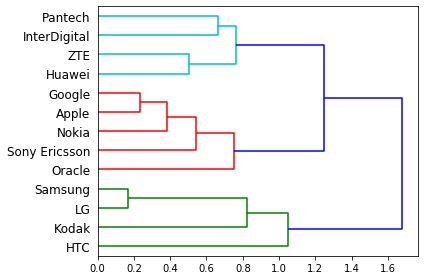

In [17]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(cos_distance)
print(linkage_matrix)
dendrogram(linkage_matrix, orientation = 'right', labels = firm_names)
plt.tight_layout()
plt.show()

In [18]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 6, random_state = 1)
cluster_solution = km.fit(dtm_tfidf)
cluster_membership = km.predict(dtm_tfidf)
firm_distance_to_centroid = km.transform(dtm_tfidf)
firm_distance_to_centroid

clusters = zip(cluster_membership, firm_names) 
print('Cluster #', '  ', 'Firm_name')
for cluster, name in clusters: 
    print('   ', cluster, '      ', name)
    
cluster_dict = {'Cluster #': cluster_membership, 
                'Firm_name': firm_names, 
                'Firm_to_0': firm_distance_to_centroid[:, 0], 
                'Firm_to_1': firm_distance_to_centroid[:, 1], 
                'Firm_to_2': firm_distance_to_centroid[:, 2], 
                'Firm_to_3': firm_distance_to_centroid[:, 3], 
                'Firm_to_4': firm_distance_to_centroid[:, 4], 
                'Firm_to_5': firm_distance_to_centroid[:, 5]
               }

df_clusters = pd.DataFrame(cluster_dict, index = firm_names) 
df_clusters

Cluster #    Firm_name
    2        Apple
    2        Google
    5        HTC
    1        Huawei
    1        InterDigital
    3        Kodak
    4        LG
    1        Nokia
    2        Oracle
    0        Pantech
    4        Samsung
    0        Sony Ericsson
    1        ZTE


,Cluster #,Firm_name,Firm_to_0,Firm_to_1,Firm_to_2,Firm_to_3,Firm_to_4,Firm_to_5
Apple,2,Apple,0.722282,0.670081,0.326551,0.899051,0.788058,0.896581
Google,2,Google,0.664990,0.565505,0.300961,0.948859,0.828080,0.926855
HTC,5,HTC,0.877198,0.949703,0.900239,1.115758,0.990303,0.000000
Huawei,1,Huawei,0.855881,0.445304,0.710910,1.121546,0.938576,1.071732
InterDigital,1,InterDigital,0.871969,0.573731,0.828606,1.185562,0.995251,1.100176
Kodak,3,Kodak,1.028382,1.025329,0.917646,0.000000,0.817596,1.115758
LG,4,LG,0.870489,0.861723,0.828436,0.881042,0.218184,1.032647
Nokia,1,Nokia,0.590275,0.381097,0.519189,1.023385,0.846339,0.923654
Oracle,2,Oracle,0.936000,0.760647,0.404932,1.085715,0.947201,1.062805
Pantech,0,Pantech,0.373459,0.765500,0.901030,1.168063,0.982963,1.071319


In [19]:
from sklearn.decomposition import TruncatedSVD

num_topics = 10
num_top_words = 20

lsa = TruncatedSVD(n_components = num_topics, random_state = 1, n_iter = 2000) 
firm_topic_lsa = lsa.fit_transform(dtm_tfidf)

df = pd.DataFrame()
for idx, topic in enumerate(lsa.components_):
    topic_label = 'LSA Topic ' + str(idx)
    score = 'Score_' + str(idx)
    alist = [(terms_tfidf[i], topic[i]) for i in topic.argsort()[:-num_top_words -1:-1]]
    
    l1, l2 = zip(*alist)
    df[topic_label] = l1
    df[score] = l2

    print("Topic %d:\n%s\n" %(idx, ' '.join(l1)))
    
df

Topic 0:
method device include signal communication datum second use network provide user information receive mobile control terminal unit base image display

Topic 1:
image electrode layer second light display form substrate include color liquid organic pixel device gate film material surface crystal emit

Topic 2:
electronic device mobile communication unit remote portable second terminal antenna connect host body hinge tone circuit handheld housing board slide

Topic 3:
application object user embodiment server provide use computer associate database datum device client electronic resource query interface plurality request node

Topic 4:
service network device connect remote invention gateway electronic packet present host unit forward tone control body optical board point method

Topic 5:
signal code receive unit electrode transmit channel plurality apparatus datum use wireless connect remote antenna estimate gate host crystal second

Topic 6:
image signal wireless channel color di

,LSA Topic 0,Score_0,LSA Topic 1,Score_1,LSA Topic 2,Score_2,LSA Topic 3,Score_3,LSA Topic 4,Score_4,LSA Topic 5,Score_5,LSA Topic 6,Score_6,LSA Topic 7,Score_7,LSA Topic 8,Score_8,LSA Topic 9,Score_9
0,method,0.333073,image,0.291656,electronic,0.268340,application,0.155428,service,0.223924,signal,0.183271,image,0.382055,network,0.224213,unit,0.159412,display,0.241893
1,device,0.280936,electrode,0.250820,device,0.251388,object,0.144990,network,0.193447,code,0.168852,signal,0.185405,unit,0.197657,use,0.128136,medium,0.218309
2,include,0.219967,layer,0.229299,mobile,0.222379,user,0.127041,device,0.158307,receive,0.167141,wireless,0.175649,method,0.149481,gateway,0.126460,user,0.190087
3,signal,0.195217,second,0.184900,communication,0.213049,embodiment,0.117214,connect,0.155640,unit,0.163153,channel,0.144021,image,0.130454,database,0.114622,disclose,0.144376
4,communication,0.188387,light,0.159146,unit,0.195099,server,0.109349,remote,0.154059,electrode,0.154425,color,0.124097,terminal,0.108926,object,0.094394,interface,0.138149
5,datum,0.187295,display,0.157298,remote,0.169148,provide,0.106361,invention,0.149596,transmit,0.152193,digital,0.119069,optical,0.103443,terminal,0.093621,embodiment,0.115555
6,second,0.183171,form,0.155766,portable,0.166795,use,0.105014,gateway,0.133434,channel,0.146718,printing,0.110493,service,0.095424,host,0.090007,digital,0.115263
7,use,0.155192,substrate,0.150291,second,0.156611,computer,0.103883,electronic,0.128504,plurality,0.138773,receive,0.109429,implement,0.088236,application,0.089595,player,0.115167
8,network,0.148424,include,0.138146,terminal,0.155137,associate,0.100413,packet,0.125297,apparatus,0.108001,transmit,0.104575,remote,0.084576,memory,0.086898,item,0.109284
9,provide,0.142027,color,0.114096,antenna,0.143824,database,0.095850,present,0.120017,datum,0.101965,code,0.094754,transmit,0.078447,remote,0.079472,electronic,0.107199


In [20]:
print(topic)

[-0.00093778  0.00186696 -0.00736726 ...  0.00024096  0.00010398
  0.00086738]


In [28]:
print(firm_topic_lsa)
df = pd.DataFrame(firm_topic_lsa, index = firm_names, columns = ['Topic ' + str(i) for i in range(num_topics)])
df

[[ 9.02689485e-01  7.42788637e-02  4.06478554e-02  2.54726224e-01
  -7.52708876e-02 -5.50296380e-02  2.37578564e-02 -1.92012400e-01
  -1.85315961e-02  2.31510300e-01]
 [ 9.25762921e-01 -6.85147625e-02  1.25722091e-02  2.08473964e-01
  -1.20491023e-01 -5.96143980e-02  1.18969433e-02 -4.35119622e-02
  -4.44516075e-02  2.28540058e-02]
 [ 6.57646485e-01  1.48620285e-01  5.79639472e-01  1.10349182e-01
   3.46816599e-01  2.08747564e-01  8.84479099e-02  1.22272340e-01
   9.92466599e-02  1.77269404e-02]
 [ 8.07029027e-01 -2.97735673e-01 -2.43308794e-01  4.90229241e-02
   2.61457101e-01 -6.93715512e-02 -1.03672401e-01  2.39702646e-01
  -2.06292572e-01  5.51364253e-02]
 [ 7.26922743e-01 -3.00540265e-01 -8.83430151e-02 -1.29892228e-01
  -2.62939982e-01  4.17261653e-01  3.28090727e-01  4.25902289e-02
  -2.32759103e-02  2.76107572e-03]
 [ 6.21827533e-01  5.74677148e-01 -1.66660626e-01  1.69912105e-02
  -3.33823324e-02 -3.09991859e-01  3.63722952e-01  1.44810856e-01
   5.00776246e-02 -2.35163062e-02

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9
Apple,0.902689,0.074279,0.040648,0.254726,-0.075271,-0.055030,0.023758,-0.192012,-0.018532,0.231510
Google,0.925763,-0.068515,0.012572,0.208474,-0.120491,-0.059614,0.011897,-0.043512,-0.044452,0.022854
HTC,0.657646,0.148620,0.579639,0.110349,0.346817,0.208748,0.088448,0.122272,0.099247,0.017727
Huawei,0.807029,-0.297736,-0.243309,0.049023,0.261457,-0.069372,-0.103672,0.239703,-0.206293,0.055136
InterDigital,0.726923,-0.300540,-0.088343,-0.129892,-0.262940,0.417262,0.328091,0.042590,-0.023276,0.002761
Kodak,0.621828,0.574677,-0.166661,0.016991,-0.033382,-0.309992,0.363723,0.144811,0.050078,-0.023516
LG,0.772045,0.431293,-0.180890,-0.243933,0.045610,0.170537,-0.232873,-0.039977,-0.020497,0.056160
Nokia,0.932194,-0.205886,0.019772,0.027190,-0.002674,-0.053030,0.011763,0.025341,-0.164180,-0.102867
Oracle,0.774198,-0.075122,-0.155738,0.483755,-0.134574,0.053953,-0.208833,0.070803,0.225083,-0.104725
Pantech,0.725592,-0.224074,0.227361,-0.431150,-0.242789,-0.198293,-0.162318,0.170659,0.161705,0.066842


In [31]:
lsa.components_.shape

(10, 7916)

In [33]:
lsa.components_

array([[ 1.19887909e-04,  1.42752832e-03,  1.15373485e-03, ...,
         1.10616488e-04,  1.10042880e-04,  4.37683674e-04],
       [-2.33070522e-06, -4.08298079e-03, -9.33227112e-04, ...,
        -6.58701352e-06, -6.83695057e-06,  1.65710308e-03],
       [-5.23761799e-05, -4.33709283e-03, -1.40672971e-04, ...,
        -1.39127513e-05, -9.77051836e-06, -1.05107940e-03],
       ...,
       [ 7.28576812e-06,  7.49373372e-04,  6.30899425e-04, ...,
        -1.68445010e-04, -1.72524455e-04, -7.82014279e-04],
       [-5.63214387e-04, -9.26443712e-04, -6.61132481e-03, ...,
        -1.85016823e-04, -1.74244574e-04, -3.11926030e-04],
       [-9.37779425e-04,  1.86695842e-03, -7.36725938e-03, ...,
         2.40964381e-04,  1.03976517e-04,  8.67376031e-04]])

In [34]:
df = pd.DataFrame(lsa.components_, columns = terms_tfidf, index = ['Topic ' + str(i) for i in range(num_topics)])
df

,aa,aaa,aal,ab,abandon,abbreviate,abbreviated,abbreviation,aberration,ability,...,zip,zirconium,zn,zno,zone,zoom,zooming,δt,δv,μm
Topic 0,0.000120,0.001428,0.001154,0.000242,0.000043,0.000123,0.000017,0.000118,0.000562,0.002598,...,0.000370,0.000167,0.000098,0.000177,0.004016,0.008513,0.000153,0.000111,0.000110,0.000438
Topic 1,-0.000002,-0.004083,-0.000933,0.000125,0.000022,0.000279,0.000064,0.000246,0.002109,-0.002763,...,-0.000232,0.000778,0.000381,0.000679,0.003320,0.002154,0.000077,-0.000007,-0.000007,0.001657
Topic 2,-0.000052,-0.004337,-0.000141,0.000571,-0.000096,-0.000178,-0.000040,-0.000112,-0.000890,-0.003730,...,-0.000672,-0.000407,-0.000220,-0.000413,-0.002828,0.014616,-0.000337,-0.000014,-0.000010,-0.001051
Topic 3,-0.000060,-0.001303,-0.000202,0.000200,0.000190,-0.000139,-0.000057,-0.000010,0.000348,0.004881,...,0.002446,-0.000297,-0.000281,-0.000560,0.006355,-0.020913,0.000684,0.000217,0.000229,-0.001495
Topic 4,0.000024,0.008443,0.000100,-0.000331,-0.000083,-0.000024,0.000016,-0.000029,-0.000399,0.003195,...,-0.001056,0.000046,0.000086,0.000164,-0.006996,-0.025210,-0.000297,-0.000208,-0.000210,0.000423
Topic 5,0.000044,-0.002632,-0.000424,-0.000445,0.000082,0.000259,0.000065,0.000153,-0.001930,-0.002471,...,0.000330,-0.000042,0.000389,0.000693,0.001651,-0.033430,0.000291,-0.000067,-0.000067,0.001692
Topic 6,-0.000066,0.000392,-0.000628,-0.000074,-0.000237,-0.000332,-0.000082,-0.000306,0.002514,-0.002015,...,-0.001683,0.000311,-0.000303,-0.000737,-0.002606,-0.002059,-0.000807,-0.000042,-0.000004,-0.002212
Topic 7,0.000007,0.000749,0.000631,-0.001631,0.000075,-0.000215,-0.000030,-0.000509,0.000341,-0.001953,...,0.000864,0.000188,-0.000203,-0.000339,-0.001757,0.016566,0.000262,-0.000168,-0.000173,-0.000782
Topic 8,-0.000563,-0.000926,-0.006611,-0.000802,0.000329,-0.000117,-0.000011,-0.000101,0.000543,0.001889,...,0.003310,0.000153,-0.000013,-0.000080,0.005652,0.018385,0.001175,-0.000185,-0.000174,-0.000312
Topic 9,-0.000938,0.001867,-0.007367,0.000595,-0.000257,0.000026,0.000023,0.001451,0.002828,0.005529,...,-0.003092,-0.000811,-0.000548,-0.000259,-0.011643,0.019977,-0.001034,0.000241,0.000104,0.000867


In [29]:
list1 = [(1,2), (3,4), (5,6), (7,8)]

a, b = zip(*list1)
print(a, b)

(1, 3, 5, 7) (2, 4, 6, 8)
